In [1]:
## 4.13

In [2]:
from ISLP import load_data
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np

In [3]:
Weekly = load_data('Weekly')
Weekly.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [4]:
## (a)

In [5]:
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [6]:
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [7]:
Weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


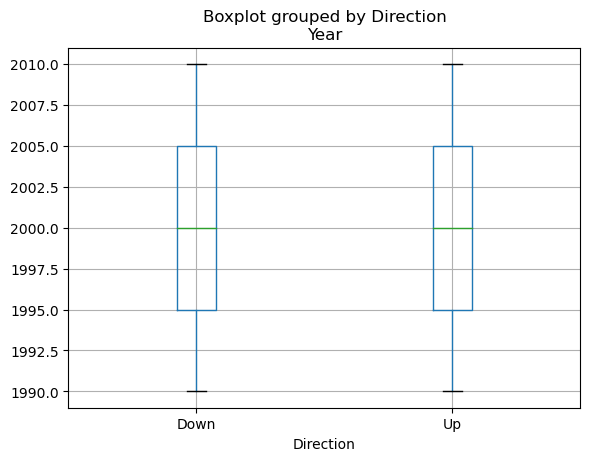

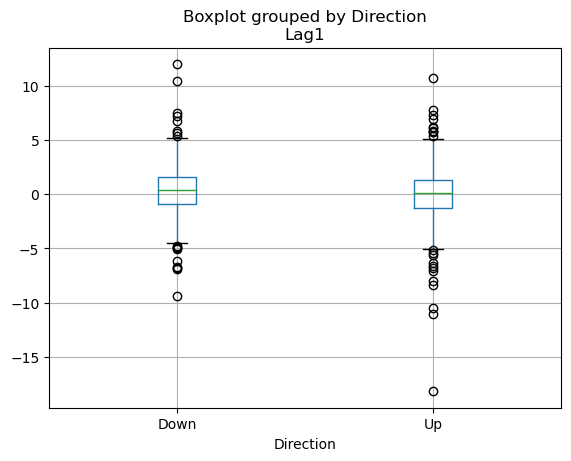

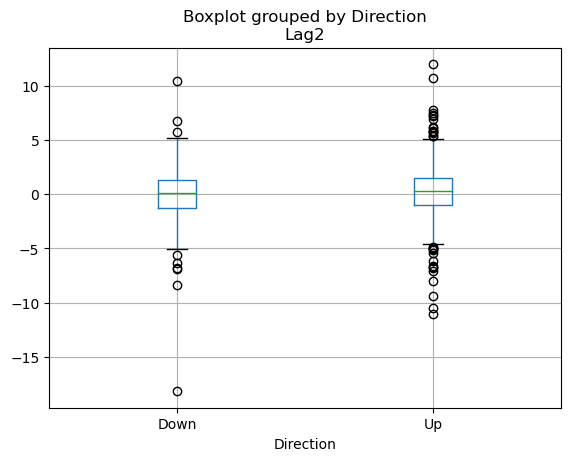

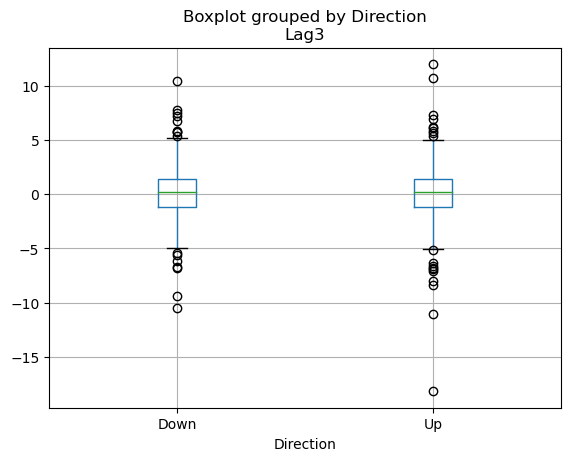

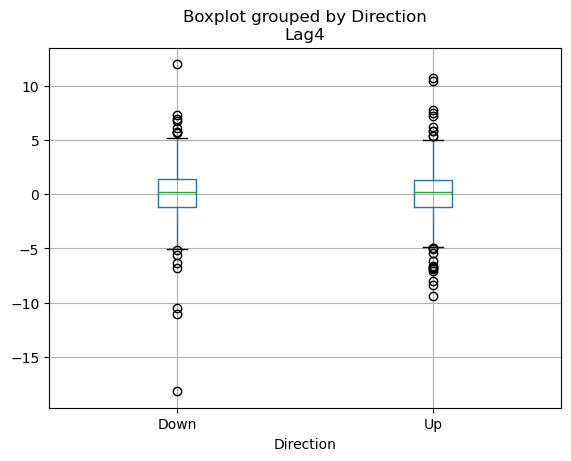

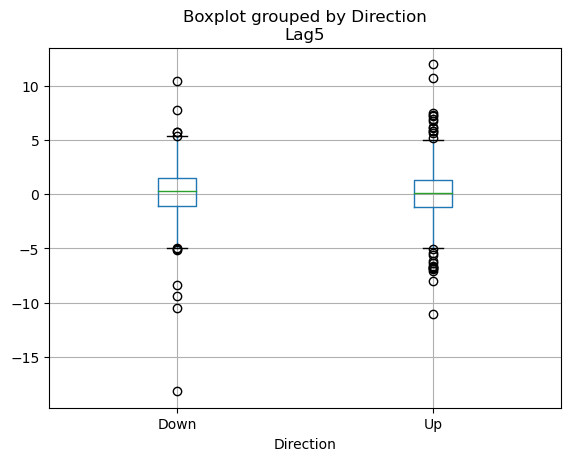

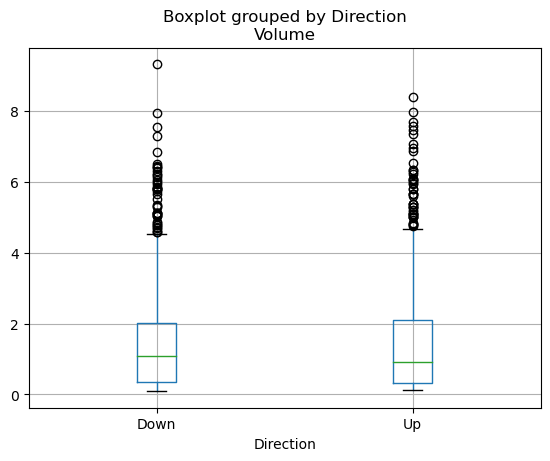

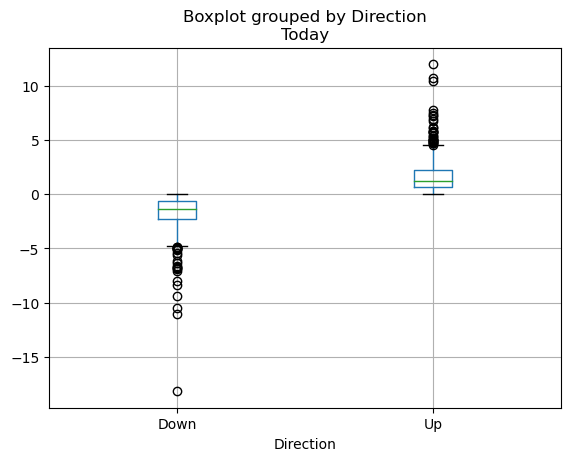

In [8]:
for column in list(Weekly.columns.values):
    if column != 'Direction':
        Weekly.boxplot(column = column, by = 'Direction')

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Lag1', ylabel='Year'>,
        <AxesSubplot:xlabel='Lag2', ylabel='Year'>,
        <AxesSubplot:xlabel='Lag3', ylabel='Year'>,
        <AxesSubplot:xlabel='Lag4', ylabel='Year'>,
        <AxesSubplot:xlabel='Lag5', ylabel='Year'>,
        <AxesSubplot:xlabel='Volume', ylabel='Year'>,
        <AxesSubplot:xlabel='Today', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='Lag1'>,
        <AxesSubplot:xlabel='Lag1', ylabel='Lag1'>,
        <AxesSubplot:xlabel='Lag2', ylabel='Lag1'>,
        <AxesSubplot:xlabel='Lag3', ylabel='Lag1'>,
        <AxesSubplot:xlabel='Lag4', ylabel='Lag1'>,
        <AxesSubplot:xlabel='Lag5', ylabel='Lag1'>,
        <AxesSubplot:xlabel='Volume', ylabel='Lag1'>,
        <AxesSubplot:xlabel='Today', ylabel='Lag1'>],
       [<AxesSubplot:xlabel='Year', ylabel='Lag2'>,
        <AxesSubplot:xlabel='Lag1', ylabel='Lag2'>,
        <AxesSubplot:xlabel='Lag2', ylabel='Lag2'>,
    

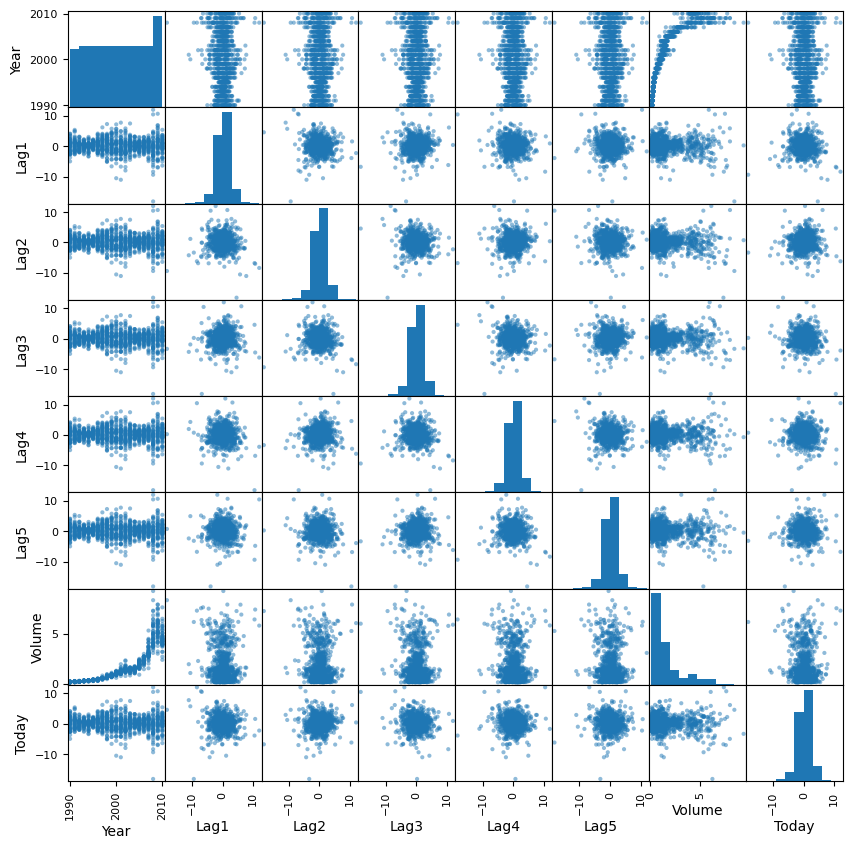

In [9]:
pd.plotting.scatter_matrix(Weekly[list(Weekly.columns.values)[:-1]], figsize = (10,10))

In [10]:
## Year and Volume have a visibly strong relationship.

In [11]:
## b

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as GNB
import statsmodels.api as sm

In [13]:
Weekly['Direction'] = Weekly['Direction'].map({'Down': 0,'Up': 1})

Y = Weekly['Direction']
X = Weekly[list(Weekly.columns.values)[1:7]]
X = sm.add_constant(X)
results = sm.Logit(Y, X).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Thu, 02 Nov 2023   Pseudo R-squ.:                0.006580
Time:                        17:56:59   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

In [14]:
# Since P>|z| < 0.05 for Lag2, it is statistically significant.

In [15]:
## c

In [16]:
Weekly[list(Weekly.columns.values)[1:7]]

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.816,1.572,-3.936,-0.229,-3.484,0.154976
1,-0.270,0.816,1.572,-3.936,-0.229,0.148574
2,-2.576,-0.270,0.816,1.572,-3.936,0.159837
3,3.514,-2.576,-0.270,0.816,1.572,0.161630
4,0.712,3.514,-2.576,-0.270,0.816,0.153728
...,...,...,...,...,...,...
1084,-0.861,0.043,-2.173,3.599,0.015,3.205160
1085,2.969,-0.861,0.043,-2.173,3.599,4.242568
1086,1.281,2.969,-0.861,0.043,-2.173,4.835082
1087,0.283,1.281,2.969,-0.861,0.043,4.454044


In [17]:
cm = confusion_matrix(Weekly['Direction'], np.where(results.predict(X) > 0.5, 1, 0))
# print(cm)

In [18]:
print('       Predicted')
print('       0     1')
print('True 0 {}    {}'.format(cm[0][0], cm[0][1]))
print('     1 {}    {}'.format(cm[1][0], cm[1][1]))

       Predicted
       0     1
True 0 54    430
     1 48    557


In [19]:
print('overall fraction of correct predictions: {}'.format((cm[0][0] + cm[1][1])/np.sum(cm)))

overall fraction of correct predictions: 0.5610651974288338


In [20]:
## A large portion of the observations ((430+557)/(430+557+54+48) = 90.6%) get predicted as "Up"
## 430 of 484 (88.8%) "Down" predictions were wrongly classified as "Up"
## The model performs well for identifying "Up" with an accuracy of (557/(48+557) = 92.1%)

In [21]:
## d

In [22]:
train = Weekly[Weekly['Year'] <= 2008]
test = Weekly[Weekly['Year'] > 2008]
train_X = train['Lag2']
train_Y = train['Direction']
train_X = sm.add_constant(train_X)
results = sm.Logit(train_Y, train_X).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Nov 2023   Pseudo R-squ.:                0.003076
Time:                        17:57:00   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [23]:
cm = confusion_matrix(test['Direction'], np.where(results.predict(sm.add_constant(test['Lag2'])) > 0.5, 1, 0))

In [24]:
print('       Predicted')
print('       0     1')
print('True 0 {}    {}'.format(cm[0][0], cm[0][1]))
print('     1 {}    {}'.format(cm[1][0], cm[1][1]))

       Predicted
       0     1
True 0 9    34
     1 5    56


In [25]:
print('overall fraction of correct predictions: {}'.format((cm[0][0] + cm[1][1])/np.sum(cm)))

overall fraction of correct predictions: 0.625


In [26]:
## e

In [27]:
train = Weekly[Weekly['Year'] <= 2008]
test = Weekly[Weekly['Year'] > 2008]
train_X = train['Lag2']
train_Y = train['Direction']
test_X = test['Lag2']
test_Y = test['Direction']

lda = LDA()
lda.fit(train_X.to_frame(), train_Y)

LinearDiscriminantAnalysis()

In [28]:
prediction = lda.predict(test_X.to_frame())
cm = confusion_matrix(test_Y, prediction)

In [29]:
print('       Predicted')
print('       0     1')
print('True 0 {}    {}'.format(cm[0][0], cm[0][1]))
print('     1 {}    {}'.format(cm[1][0], cm[1][1]))

       Predicted
       0     1
True 0 9    34
     1 5    56


In [30]:
print('overall fraction of correct predictions: {}'.format((cm[0][0] + cm[1][1])/np.sum(cm)))

overall fraction of correct predictions: 0.625


In [31]:
## f

In [32]:
train = Weekly[Weekly['Year'] <= 2008]
test = Weekly[Weekly['Year'] > 2008]
train_X = train['Lag2']
train_Y = train['Direction']
test_X = test['Lag2']
test_Y = test['Direction']

qda = QDA()
qda.fit(train_X.to_frame(), train_Y)

QuadraticDiscriminantAnalysis()

In [33]:
prediction = qda.predict(test_X.to_frame())
cm = confusion_matrix(test_Y, prediction)

In [34]:
print('       Predicted')
print('       0     1')
print('True 0 {}    {}'.format(cm[0][0], cm[0][1]))
print('     1 {}    {}'.format(cm[1][0], cm[1][1]))

       Predicted
       0     1
True 0 0    43
     1 0    61


In [35]:
print('overall fraction of correct predictions: {}'.format((cm[0][0] + cm[1][1])/np.sum(cm)))

overall fraction of correct predictions: 0.5865384615384616


In [36]:
## g

In [37]:
train = Weekly[Weekly['Year'] <= 2008]
test = Weekly[Weekly['Year'] > 2008]
train_X = train['Lag2']
train_Y = train['Direction']
test_X = test['Lag2']
test_Y = test['Direction']

knn = KNN(n_neighbors = 1)
knn.fit(train_X.to_frame(), train_Y)

KNeighborsClassifier(n_neighbors=1)

In [38]:
prediction = knn.predict(test_X.to_frame())
cm = confusion_matrix(test_Y, prediction)

In [39]:
print('       Predicted')
print('       0     1')
print('True 0 {}    {}'.format(cm[0][0], cm[0][1]))
print('     1 {}    {}'.format(cm[1][0], cm[1][1]))

       Predicted
       0     1
True 0 21    22
     1 30    31


In [40]:
print('overall fraction of correct predictions: {}'.format((cm[0][0] + cm[1][1])/np.sum(cm)))

overall fraction of correct predictions: 0.5


In [41]:
## h

In [42]:
train = Weekly[Weekly['Year'] <= 2008]
test = Weekly[Weekly['Year'] > 2008]
train_X = train['Lag2']
train_Y = train['Direction']
test_X = test['Lag2']
test_Y = test['Direction']

gnb = GNB()
gnb.fit(train_X.to_frame(), train_Y)

GaussianNB()

In [43]:
prediction = gnb.predict(test_X.to_frame())
cm = confusion_matrix(test_Y, prediction)

In [44]:
print('       Predicted')
print('       0     1')
print('True 0 {}    {}'.format(cm[0][0], cm[0][1]))
print('     1 {}    {}'.format(cm[1][0], cm[1][1]))

       Predicted
       0     1
True 0 0    43
     1 0    61


In [45]:
print('overall fraction of correct predictions: {}'.format((cm[0][0] + cm[1][1])/np.sum(cm)))

overall fraction of correct predictions: 0.5865384615384616


In [46]:
## i

In [47]:
## Logistic Regression and LDA have the highest overall fraction of correct predictions (62.5%)

In [48]:
## j

In [49]:
train = Weekly[Weekly['Year'] <= 2008]
test = Weekly[Weekly['Year'] > 2008]
train_X = train['Lag2']
train_Y = train['Direction']
test_X = test['Lag2']
test_Y = test['Direction']

accuracies = []

for i in range (1, 11):
    knn = KNN(n_neighbors = i)
    knn.fit(train_X.to_frame(), train_Y)

    prediction = knn.predict(test_X.to_frame())
    cm = confusion_matrix(test_Y, prediction)
    
    accuracies.append((cm[0][0] + cm[1][1])/np.sum(cm))

for i in range(10):
    print('overall fraction of correct predictions using k = {} neighbours: {}'.format(i + 1, accuracies[i]))

overall fraction of correct predictions using k = 1 neighbours: 0.5
overall fraction of correct predictions using k = 2 neighbours: 0.4423076923076923
overall fraction of correct predictions using k = 3 neighbours: 0.5576923076923077
overall fraction of correct predictions using k = 4 neighbours: 0.5769230769230769
overall fraction of correct predictions using k = 5 neighbours: 0.5288461538461539
overall fraction of correct predictions using k = 6 neighbours: 0.5096153846153846
overall fraction of correct predictions using k = 7 neighbours: 0.5480769230769231
overall fraction of correct predictions using k = 8 neighbours: 0.5480769230769231
overall fraction of correct predictions using k = 9 neighbours: 0.5480769230769231
overall fraction of correct predictions using k = 10 neighbours: 0.5673076923076923


In [50]:
## KNN method works best when n_neighbors is set to 4 and predicts almost 58% of observations correctly

In [51]:
## 4.14

In [53]:
import pandas as pd

Auto = pd.read_csv('Auto.csv')
Auto['horsepower'] = pd.to_numeric(Auto['horsepower'], errors ='coerce')
Auto.dropna(inplace = True)
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [54]:
## a

In [55]:
Auto['mpg01']= np.where(Auto['mpg'] > Auto['mpg'].median(), 1, 0)

In [56]:
## b

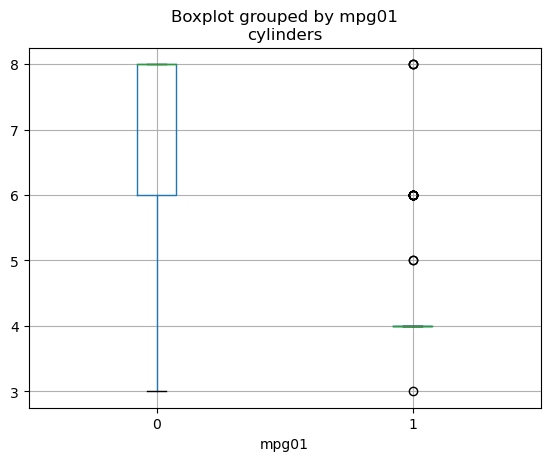

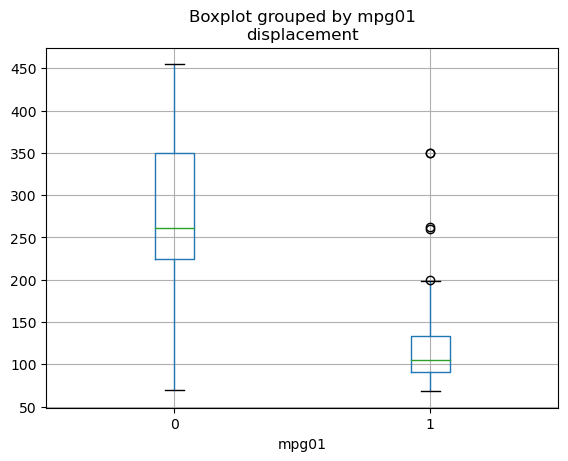

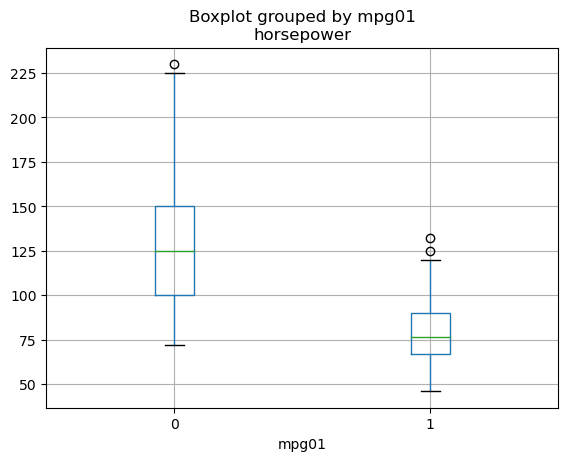

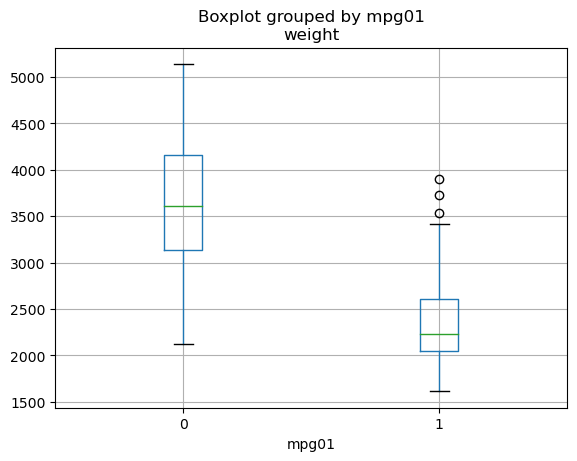

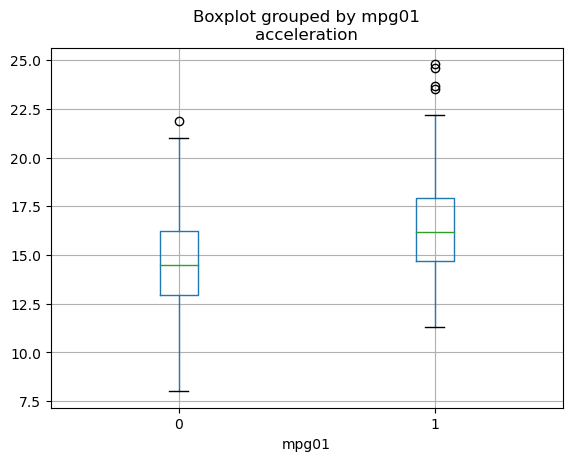

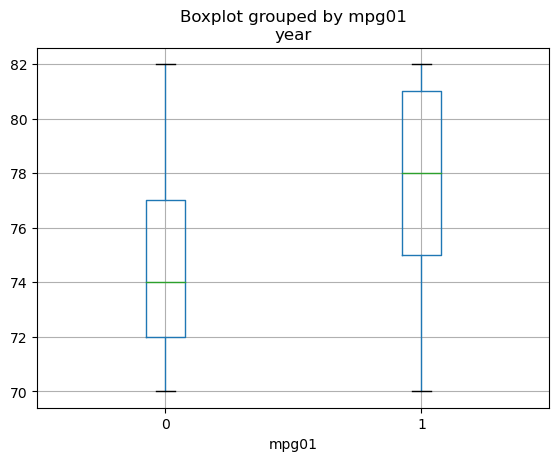

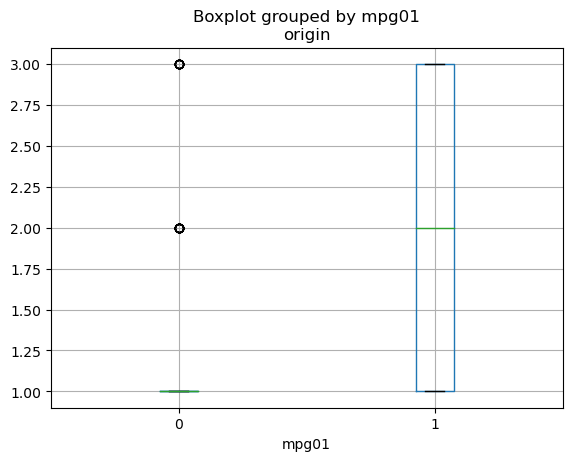

In [57]:
for column in list(Auto.columns.values):
    if column != 'mpg01' and column != 'name' and column != 'mpg':
        Auto.boxplot(column = column, by = 'mpg01')

array([[<AxesSubplot:xlabel='cylinders', ylabel='cylinders'>,
        <AxesSubplot:xlabel='displacement', ylabel='cylinders'>,
        <AxesSubplot:xlabel='horsepower', ylabel='cylinders'>,
        <AxesSubplot:xlabel='weight', ylabel='cylinders'>,
        <AxesSubplot:xlabel='acceleration', ylabel='cylinders'>,
        <AxesSubplot:xlabel='year', ylabel='cylinders'>,
        <AxesSubplot:xlabel='origin', ylabel='cylinders'>,
        <AxesSubplot:xlabel='mpg01', ylabel='cylinders'>],
       [<AxesSubplot:xlabel='cylinders', ylabel='displacement'>,
        <AxesSubplot:xlabel='displacement', ylabel='displacement'>,
        <AxesSubplot:xlabel='horsepower', ylabel='displacement'>,
        <AxesSubplot:xlabel='weight', ylabel='displacement'>,
        <AxesSubplot:xlabel='acceleration', ylabel='displacement'>,
        <AxesSubplot:xlabel='year', ylabel='displacement'>,
        <AxesSubplot:xlabel='origin', ylabel='displacement'>,
        <AxesSubplot:xlabel='mpg01', ylabel='displacement'>]

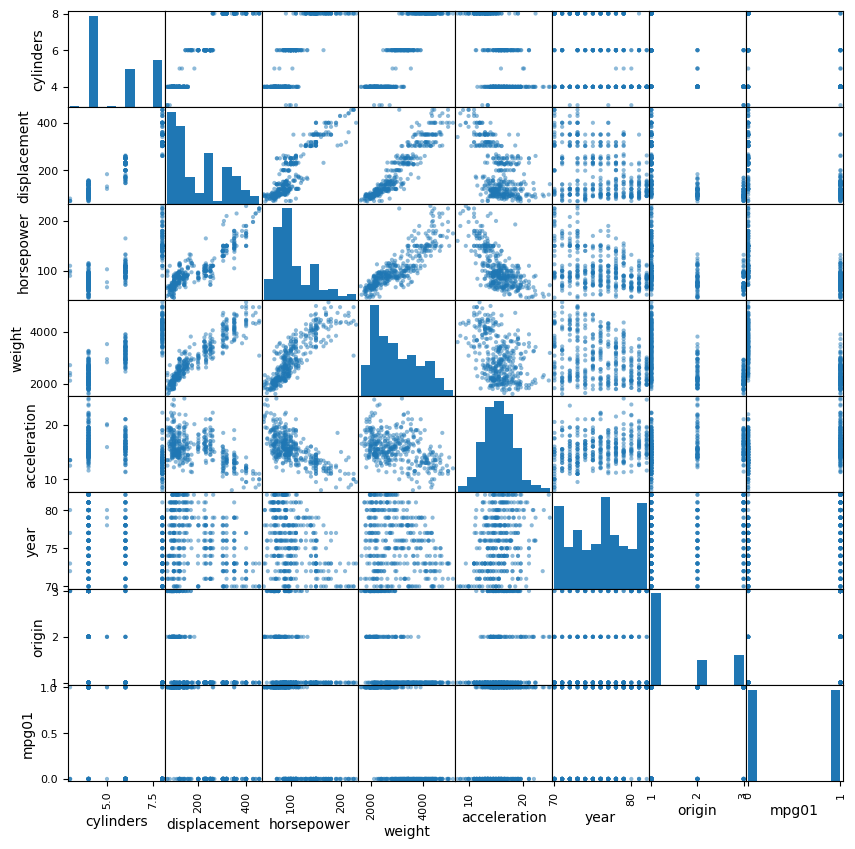

In [58]:
pd.plotting.scatter_matrix(Auto[list(Auto.columns.values)[1:-2] + list(Auto.columns.values)[-1:]], figsize = (10,10))

In [59]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


In [60]:
## mpg is obviously related to mpg01
## Apart from mpg, we from the correlation matrix,
## cylinders, displacement and weight also display strong correlation with mpg01

In [61]:
## c

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
train_X, test_X, train_Y, test_Y = train_test_split(Auto[['cylinders', 'displacement', 'weight']], Auto['mpg01'], 
                                                    train_size = 0.65, random_state = 42)

In [64]:
## d

In [65]:
lda = LDA()
lda.fit(train_X, train_Y)

prediction = lda.predict(test_X)
cm = confusion_matrix(test_Y, prediction)

print('overall fraction of correct predictions: {}'.format((cm[0][0] + cm[1][1])/np.sum(cm)))
print('test error: {}'.format(1 - (cm[0][0] + cm[1][1])/np.sum(cm)))

overall fraction of correct predictions: 0.8478260869565217
test error: 0.15217391304347827


In [66]:
## e

In [67]:
qda = QDA()
qda.fit(train_X, train_Y)

prediction = qda.predict(test_X)
cm = confusion_matrix(test_Y, prediction)

print('overall fraction of correct predictions: {}'.format((cm[0][0] + cm[1][1])/np.sum(cm)))
print('test error: {}'.format(1 - (cm[0][0] + cm[1][1])/np.sum(cm)))

overall fraction of correct predictions: 0.8768115942028986
test error: 0.12318840579710144


In [68]:
## f

In [69]:
results = sm.Logit(train_Y, sm.add_constant(train_X)).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.251553
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  mpg01   No. Observations:                  254
Model:                          Logit   Df Residuals:                      250
Method:                           MLE   Df Model:                            3
Date:                Thu, 02 Nov 2023   Pseudo R-squ.:                  0.6369
Time:                        17:57:36   Log-Likelihood:                -63.894
converged:                       True   LL-Null:                       -175.99
Covariance Type:            nonrobust   LLR p-value:                 2.497e-48
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.1519      1.976      5.643      0.000       7.278      15.025
cylinders       -0.4797

In [70]:
cm = confusion_matrix(test_Y, np.where(results.predict(sm.add_constant(test_X)) > 0.5, 1, 0))
print('overall fraction of correct predictions: {}'.format((cm[0][0] + cm[1][1])/np.sum(cm)))
print('test error: {}'.format(1 - (cm[0][0] + cm[1][1])/np.sum(cm)))

overall fraction of correct predictions: 0.855072463768116
test error: 0.14492753623188404


In [71]:
## g

In [72]:
gnb = GNB()
gnb.fit(train_X, train_Y)

prediction = gnb.predict(test_X)
cm = confusion_matrix(test_Y, prediction)

print('overall fraction of correct predictions: {}'.format((cm[0][0] + cm[1][1])/np.sum(cm)))
print('test error: {}'.format(1 - (cm[0][0] + cm[1][1])/np.sum(cm)))

overall fraction of correct predictions: 0.8623188405797102
test error: 0.1376811594202898


In [73]:
## h
accuracies = []

for i in range (1, 11):
    knn = KNN(n_neighbors = i)
    knn.fit(train_X, train_Y)

    prediction = knn.predict(test_X)
    cm = confusion_matrix(test_Y, prediction)
    
    accuracies.append((cm[0][0] + cm[1][1])/np.sum(cm))

for i in range(10):
    print('overall fraction of correct predictions using k = {} neighbours: {}'.format(i + 1, accuracies[i]))
    print('test error using k = {} neighbours: {}'.format(i + 1, 1 - accuracies[i]))

overall fraction of correct predictions using k = 1 neighbours: 0.855072463768116
test error using k = 1 neighbours: 0.14492753623188404
overall fraction of correct predictions using k = 2 neighbours: 0.8623188405797102
test error using k = 2 neighbours: 0.1376811594202898
overall fraction of correct predictions using k = 3 neighbours: 0.855072463768116
test error using k = 3 neighbours: 0.14492753623188404
overall fraction of correct predictions using k = 4 neighbours: 0.8623188405797102
test error using k = 4 neighbours: 0.1376811594202898
overall fraction of correct predictions using k = 5 neighbours: 0.8333333333333334
test error using k = 5 neighbours: 0.16666666666666663
overall fraction of correct predictions using k = 6 neighbours: 0.8405797101449275
test error using k = 6 neighbours: 0.1594202898550725
overall fraction of correct predictions using k = 7 neighbours: 0.8260869565217391
test error using k = 7 neighbours: 0.17391304347826086
overall fraction of correct predictions

In [74]:
## KNN method works best when n_neighbors is set to 2 or 5 and predicts around 86% of observations correctly

In [75]:
## 5.5

In [76]:
from ISLP import load_data
import numpy as np
np.random.seed(0)

Default = load_data('Default')
Default['default_dummy']= np.where(Default['default'] == 'Yes', 1, 0)
Default.head()

,default,student,balance,income,default_dummy
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


In [77]:
## a

In [78]:
train_X = Default[['balance', 'income']]
test_X = Default[['balance', 'income']]
train_Y = Default['default_dummy']
test_Y = Default['default_dummy']

results = sm.Logit(train_Y, sm.add_constant(train_X)).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          default_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 02 Nov 2023   Pseudo R-squ.:                  0.4594
Time:                        17:57:36   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0

In [79]:
cm = confusion_matrix(test_Y, np.where(results.predict(sm.add_constant(test_X)) > 0.5, 1, 0))
print('overall fraction of correct predictions: {}'.format((cm[0][0] + cm[1][1])/np.sum(cm)))
print('test error: {}'.format(1 - (cm[0][0] + cm[1][1])/np.sum(cm)))

overall fraction of correct predictions: 0.9737
test error: 0.02629999999999999


In [80]:
## b

In [81]:
## i
train_X, test_X, train_Y, test_Y = train_test_split(Default[['balance', 'income']], Default['default_dummy'], 
                                                    train_size = 0.5, random_state = 42)

## ii
results = sm.Logit(train_Y, sm.add_constant(train_X)).fit()

## iii
predictions = np.where(results.predict(sm.add_constant(test_X)) > 0.5, 1, 0)

## iv
print('validation set error: {}'.format(1 - (predictions == test_Y).mean()))

Optimization terminated successfully.
         Current function value: 0.078493
         Iterations 10
validation set error: 0.025800000000000045


In [82]:
## c

In [83]:
for i in range(3):
    ## i
    train_X, test_X, train_Y, test_Y = train_test_split(Default[['balance', 'income']], Default['default_dummy'], 
                                                        train_size = 0.5, random_state = i * 5)

    ## ii
    results = sm.Logit(train_Y, sm.add_constant(train_X)).fit()

    ## iii
    predictions = np.where(results.predict(sm.add_constant(test_X)) > 0.5, 1, 0)

    ## iv
    print('validation set error (iteration {}): {}'.format(i + 1, 1 - (predictions == test_Y).mean()))

Optimization terminated successfully.
         Current function value: 0.072956
         Iterations 10
validation set error (iteration 1): 0.029000000000000026
Optimization terminated successfully.
         Current function value: 0.079338
         Iterations 10
validation set error (iteration 2): 0.025800000000000045
Optimization terminated successfully.
         Current function value: 0.079227
         Iterations 10
validation set error (iteration 3): 0.0252


In [84]:
## The validation set errors vary depending on the split used
## This result is discussed as one of the drawbacks of validation set method in the book

In [85]:
## d

In [86]:
Default['student_dummy']= np.where(Default['student'] == 'Yes', 1, 0)

## i
train_X, test_X, train_Y, test_Y = train_test_split(Default[['balance', 'income', 'student_dummy']], 
                                                    Default['default_dummy'], train_size = 0.5, random_state = 42)

## ii
results = sm.Logit(train_Y, sm.add_constant(train_X)).fit()

## iii
predictions = np.where(results.predict(sm.add_constant(test_X)) > 0.5, 1, 0)

## iv
print('validation set error: {}'.format(1 - (predictions == test_Y).mean()))

Optimization terminated successfully.
         Current function value: 0.077900
         Iterations 10
validation set error: 0.025599999999999956


In [87]:
## The validation set error before including a dummy variable for student was ~ 0.0258 (random_state = 42), 
## while it dropped to ~ 0.0256 after including a dummy variable for student.
## While there is a small decrease in the estimation of test error rate,
## the reduction is very minor and doesn't justify adding an extra parameter to the model

In [88]:
## 5.6

In [89]:
import numpy as np
np.random.seed(0)

In [90]:
## a

In [91]:
train_X = Default[['balance', 'income']]
test_X = Default[['balance', 'income']]
train_Y = Default['default_dummy']
test_Y = Default['default_dummy']

results = sm.GLM(train_Y, sm.add_constant(train_X), family=sm.families.Binomial()).fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          default_dummy   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Thu, 02 Nov 2023   Deviance:                       1579.0
Time:                        17:57:37   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.0

In [92]:
# standard error for the coefcients associated with balance = 0.0002
# standard error for the coefcients associated with income = 4.99e-06

In [93]:
## b

In [94]:
def boot_fn(X, index = []):
    
    if len(index) == 0:
        index = np.arange(len(X))
    
    train_X = X[['balance', 'income']].iloc[index]
    test_X = X[['balance', 'income']].iloc[index]
    train_Y = X['default_dummy'].iloc[index]
    test_Y = X['default_dummy'].iloc[index]
    
    results = sm.GLM(train_Y, sm.add_constant(train_X), family=sm.families.Binomial()).fit()
    return (results.params[1], results.params[2], results.bse[1], results.bse[2])

size = 100
index = np.array((np.random.rand(size) * len(Default)).astype(int))
coefficients = boot_fn(Default, index)
print('coefficient estimate for balance: {}'.format(coefficients[0]))
print('coefficient estimate for income: {}'.format(coefficients[1]))

coefficient estimate for balance: 0.005200483907487687
coefficient estimate for income: -1.8459365011241055e-05


In [95]:
## c

In [96]:
def boot(Default, size = None):
    
    if size == None:
        size = len(Default)

    sample_index = np.array((np.random.rand(size) * len(Default)).astype(int))
    sample_data = Default.iloc[sample_index]

    return sample_data

In [97]:
size = 100
coefficient_estimates = np.empty((2, size))
standard_errors = np.empty((2, size))

for i in range(size):
    coefficient_estimates[0][i] = boot_fn(boot(Default))[0]
    coefficient_estimates[1][i] = boot_fn(boot(Default))[1]
    standard_errors[0][i] = boot_fn(boot(Default))[2]
    standard_errors[1][i] = boot_fn(boot(Default))[3]

In [98]:
print('coefficient estimate of balance: {}'.format(np.mean(coefficient_estimates, axis = 1)[0]))
print('standard error estimate of balance: {}'.format(np.mean(standard_errors, axis = 1)[0]))
print('coefficient estimate of income: {}'.format(np.mean(coefficient_estimates, axis = 1)[1]))
print('standard error estimate of income: {}'.format(np.mean(standard_errors, axis = 1)[1]))

coefficient estimate of balance: 0.005695048749242933
standard error estimate of balance: 0.00022976950819556072
coefficient estimate of income: 2.0327157379153262e-05
standard error estimate of income: 5.015278738425073e-06


In [99]:
## d

In [100]:
balance_error_bf = np.mean(standard_errors, axis = 1)[0]
income_error_bf = np.mean(standard_errors, axis = 1)[1]
print('standard error estimate of balance using sm.GLM: {}'.format(0.0002))
print('standard error estimate of balance using bootstrap function: {}'.format(balance_error_bf))
print('standard error estimate of income using sm.GLM: {}'.format(4.99e-06))
print('standard error estimate of income using bootstrap function: {}'.format(income_error_bf))

standard error estimate of balance using sm.GLM: 0.0002
standard error estimate of balance using bootstrap function: 0.00022976950819556072
standard error estimate of income using sm.GLM: 4.99e-06
standard error estimate of income using bootstrap function: 5.015278738425073e-06


In [101]:
## The results are quite similar